In [25]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
df = pd.read_sql_query("SELECT * from Fires", conn)

In [3]:
df[10000:10010]

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
10000,1596775,201615000,SFO-MN-2012-2012312167,NONFED,ST-NASF,ST/C&L,USMNMNS,Minnesota Department of Natural Resources,MNDNR,Minnesota Department of Natural Resources,...,A,45.869652,-93.192234,8.0,PRIVATE,MN,Kanabec,065,Kanabec,b'\x00\x01\xad\x10\x00\x00\x10f\xd2\x8dMLW\xc0...
10001,1248030,1651189,SFO-GA-FY2001-Paulding-035,NONFED,ST-NASF,ST/C&L,USGAGAS,Georgia Forestry Commission,GAGAS,Georgia Forestry Commission,...,A,33.795800,-84.754400,8.0,PRIVATE,GA,Paulding,223,Paulding,b'\x00\x01\xad\x10\x00\x00\x8c\x06\xf0\x16H0U\...
10002,1357657,1838687,SFO-TN-2007-900,NONFED,ST-NASF,ST/C&L,USTNTNS,Tennessee Division of Forestry,TDA,Tennessee Department of Agriculture,...,C,35.673333,-85.186670,8.0,PRIVATE,TN,BLEDSOE,007,Bledsoe,b'\x00\x01\xad\x10\x00\x008I\xbaf\xf2KU\xc0\xb...
10003,422677,456674,SFO-GA00680505-36-175-0112-03,NONFED,ST-NASF,ST/C&L,USGAGAS,Georgia Forestry Commission,GA McRae,"GAS Ogeechee District, McRae Office",...,B,32.488140,-82.970134,14.0,MISSING/NOT SPECIFIED,GA,Laurens,175,Laurens,b'\x00\x01\xad\x10\x00\x008\xf5\xab\xad\x16\xb...
10004,1327749,1806757,SFO-NY-NY0724-2003-001058,NONFED,ST-NASF,ST/C&L,USNYNYX,Fire Department of New York,NY0724,Fire Department of New York,...,B,42.082938,-79.253567,14.0,MISSING/NOT SPECIFIED,NY,CHAUTAUQUA,013,Chautauqua,b'\x00\x01\xad\x10\x00\x00X\x88\xedr:\xd0S\xc0...
10005,917743,1044991,SWRA_SC_58622,NONFED,ST-SCSCS,ST/C&L,USSCSCS,South Carolina Forestry Commission,SCSCS4,SCS Unit 4,...,A,33.633300,-79.900000,14.0,MISSING/NOT SPECIFIED,SC,None,None,None,b'\x00\x01\xad\x10\x00\x00\x98\x99\x99\x99\x99...
10006,1261787,1665124,SFO-GA-FY2003-McDuffie-010,NONFED,ST-NASF,ST/C&L,USGAGAS,Georgia Forestry Commission,GAGAS,Georgia Forestry Commission,...,A,33.474749,-82.554078,14.0,MISSING/NOT SPECIFIED,GA,McDuffie,189,McDuffie,b'\x00\x01\xad\x10\x00\x00\x98hg\x03v\xa3T\xc0...
10007,323187,330043,W-121736,FED,DOI-WFMI,BLM,USCOCRD,Northwest District,COCRD,"Western Slope Center, Craig",...,B,40.259700,-107.415100,7.0,STATE,CO,Routt,107,Routt,b'\x00\x01\xad\x10\x00\x00p$\x97\xff\x90\xdaZ\...
10008,1110996,1352971,CDF_1997_54_2215_10563,NONFED,ST-CACDF,ST/C&L,USCABTU,Butte Unit,CABTU,Butte Unit,...,B,39.428889,-121.715000,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xf4(\\\x8f\xc2m^\xc...
10009,729301,828198,SC_5892,NONFED,ST-SCSCS,ST/C&L,USSCSCS,South Carolina Forestry Commission,SCSCS,South Carolina Forestry Commission,...,B,33.129167,-80.304167,14.0,MISSING/NOT SPECIFIED,SC,18,035,Dorchester,b'\x00\x01\xad\x10\x00\x00\xb8\x0b{ww\x13T\xc0...


In [4]:
# ohe = OneHotEncoder()
# transformed = ohe.fit_transform(df[['STATE']])
# print(ohe.categories_)
# df[ohe.categories_[0]] = transformed.toarray()

In [5]:
# X = df[["DISCOVERY_DOY", "FIRE_SIZE" ,"LONGITUDE", "LATITUDE"]]
# y = df["STAT_CAUSE_CODE"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [6]:
# from sklearn.ensemble import RandomForestClassifier
# rfr = RandomForestClassifier().fit(X_train, y_train)

In [7]:
# y_pred = rfr.predict(X_test)

In [8]:
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

In [9]:
df.groupby(["STATE", "STAT_CAUSE_DESCR"])["STAT_CAUSE_CODE"].count()
# number of fires in each country, arranged by causes

STATE  STAT_CAUSE_DESCR 
AK     Arson                150
       Campfire             499
       Children             186
       Debris Burning       777
       Equipment Use        137
                           ... 
WY     Missing/Undefined    709
       Powerline             42
       Railroad             131
       Smoking              100
       Structure              3
Name: STAT_CAUSE_CODE, Length: 623, dtype: int64

In [10]:
df.groupby(["STAT_CAUSE_DESCR", "STATE"])["STAT_CAUSE_DESCR"].count()
# number of fires in each country, arranged by causes

STAT_CAUSE_DESCR  STATE
Arson             AK        150
                  AL       7244
                  AR       3384
                  AZ       1791
                  CA       6628
                           ... 
Structure         VA         38
                  WA         44
                  WI        118
                  WV        111
                  WY          3
Name: STAT_CAUSE_DESCR, Length: 623, dtype: int64

C:\Users\97250\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


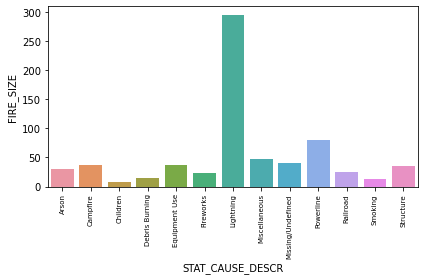

In [29]:
x = df.groupby("STAT_CAUSE_DESCR").mean()["FIRE_SIZE"].reset_index()
ax = sns.barplot(x["STAT_CAUSE_DESCR"],x["FIRE_SIZE"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=7)
plt.tight_layout()
plt.show()
# mean fire size for each of cause

In [12]:
lightning = df[df["STAT_CAUSE_DESCR"] == "Lightning"]
lightning["FIRE_SIZE"]
# fire size of each event

22         0.20
27        15.00
32         0.10
36         0.10
47         0.50
          ...  
626772     0.10
626778     0.10
626779     0.20
626790     2.50
626818     0.01
Name: FIRE_SIZE, Length: 93057, dtype: float64